Rows: 240 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): X6, X7
dbl (5): X1, X2, X3, X4, X5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


temperature,luminosity,radius,abs_magnitude,star_type,star_color,spectral_class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3068,0.002400,0.17000,16.120,0,Red,M
3042,0.000500,0.15420,16.600,0,Red,M
2600,0.000300,0.10200,18.700,0,Red,M
2800,0.000200,0.16000,16.650,0,Red,M
1939,0.000138,0.10300,20.060,0,Red,M
2840,0.000650,0.11000,16.980,0,Red,M
2637,0.000730,0.12700,17.220,0,Red,M
2600,0.000400,0.09600,17.400,0,Red,M
2650,0.000690,0.11000,17.450,0,Red,M


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `star_type = fct_recode(star_type, star_type = "star_type")`.
Caused by warning:
! Unknown levels in `f`: star_type”


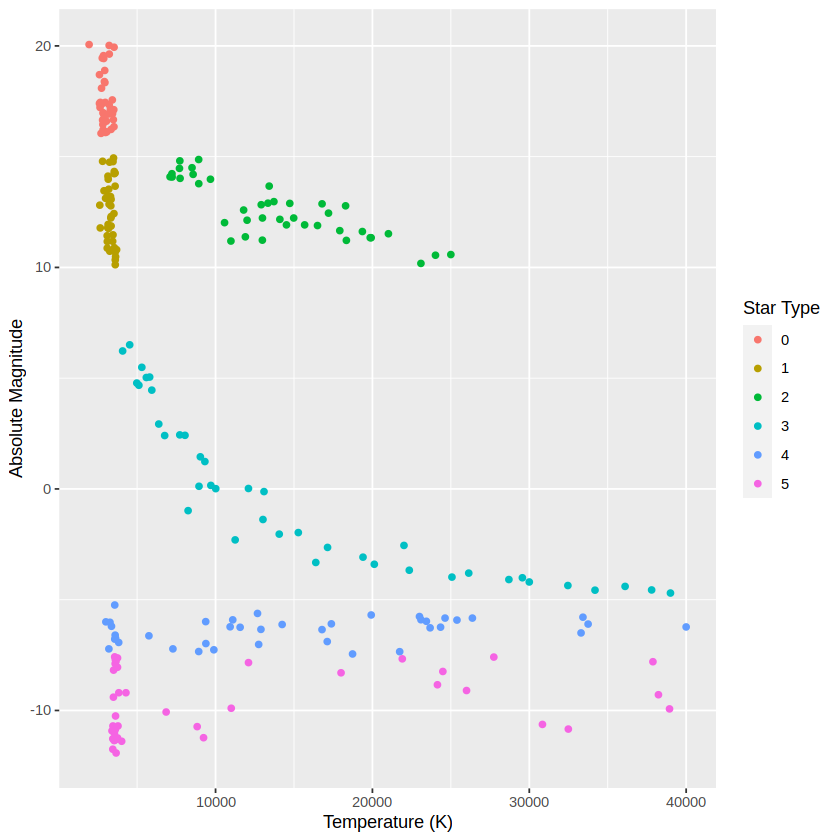

In [36]:
library(tidyverse)
library(tidymodels)
library(repr)

data<- read_csv("https://raw.githubusercontent.com/uchou92/dcsi-100-2023w1-group-28/main/6_class_csv%5B1%5D.csv", col_names=FALSE,
             skip=1)
colnames(data) <- c("temperature", "luminosity", "radius", "abs_magnitude", "star_type", "star_color", "spectral_class")
data

wrangled_data <- data|>
mutate(star_type = as_factor(star_type))|>
        mutate(star_type = fct_recode(star_type, "star_type" = "star_type"))|>
select(abs_magnitude, star_type, temperature)

proposal_plot<- wrangled_data|>
    ggplot(aes(x=temperature, y= abs_magnitude, color=star_type))+
                                      geom_point()+
                                      labs(x="Temperature (K)", y= "Absolute Magnitude", color="Star Type")
proposal_plot